# 1. Geographic Data

From scientific fields like meteorology and climatology, through to the software on our smartphones like Google Maps and Facebook check-ins, geographic data is always present in our everyday lives.` Raw geographic data like latitudes and longitudes are difficult to understand using the data charts and plots we've discussed so far. To explore this kind of data, you'll need to learn how to visualize the data on maps.`

In this mission, we'll explore the fundamentals of geographic coordinate systems and how to work with the basemap library to plot geographic data points on maps. We'll be working with flight data from the [openflights website](https://openflights.org/data.html).

 Here's a breakdown of the files we'll be working with and the most pertinent columns from each dataset:

* airlines.csv - data on each airline.

  * country - where the airline is headquartered.
  * active - if the airline is still active. 

* airports.csv - data on each airport.
  * name - name of the airport.
  * city - city the airport is located.
  * country - country the airport is located.
  * code - unique airport code.
  * latitude - latitude value.
  * longitude - longitude value.

* routes.csv - data on each flight route.
  * airline - airline for the route.
  * source - starting city for the route.
  * dest - destination city for the route.


## TODO:
* Read in the 3 CSV files into 3 separate dataframe objects - airlines, airports, and routes.
* Use the DataFrame.iloc[] method to return the first row in each dataframe as a neat table.
* Display the first rows for all dataframes using the print() function. Try to answer the following questions:
  * What's the best way to link the data from these 3 different datasets together?
  * What are the formats of the latitude and longitude values?

In [1]:
import pandas as pd

airlines=pd.read_csv('airlines.csv')
airports=pd.read_csv('airports.csv')
routes=pd.read_csv('routes.csv')

print(airlines.iloc[0])
print(airports.iloc[0])
print(routes.iloc[0])

id                       1
name        Private flight
alias                   \N
iata                     -
icao                   NaN
callsign               NaN
country                NaN
active                   Y
Name: 0, dtype: object
id                              1
name                       Goroka
city                       Goroka
country          Papua New Guinea
code                          GKA
icao                         AYGA
latitude                 -6.08169
longitude                 145.392
altitude                     5282
offset                         10
dst                             U
timezone     Pacific/Port_Moresby
Name: 0, dtype: object
airline         2B
airline_id     410
source         AER
source_id     2965
dest           KZN
dest_id       2990
codeshare      NaN
stops            0
equipment      CR2
Name: 0, dtype: object


# 2. Geographic Coordinate Systems

A geographic coordinate system allows us to locate any point on Earth using latitude and longitude coordinates.

In [2]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/dq-content/latitude_longitude.png')

In most cases, we want to visualize latitude and longitude points on two-dimensional maps. Two-dimensional maps are faster to render, easier to view on a computer and distribute, and are more familiar to the experience of popular mapping software like Google Maps. Latitude and longitude values describe points on a sphere, which is three-dimensional. To plot the values on a two-dimensional plane, `we need to convert the coordinates to the Cartesian coordinate system using a` **map projection**.

A [map projection](https://en.wikipedia.org/wiki/Map_projection) transforms points on a sphere to a two-dimensional plane. When projecting down to the two-dimensional plane, some properties are distorted. Each map projection makes trade-offs in what properties to preserve and you can read about the different trade-offs [here](https://en.wikipedia.org/wiki/Map_projection#Metric_properties_of_maps). 

* We'll use the [Mercator projection](https://en.wikipedia.org/wiki/Mercator_projection), because it is commonly used by popular mapping software.

# 3. Installing Basemap

Before we convert our flight data to Cartesian coordinates and plot it, let's learn more about the basemap toolkit. Basemap is an extension to Matplotlib that makes it easier to work with geographic data. The documentation for basemap provides a good high-level overview of what the library does:

The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on its own, but provides the facilities to transform coordinates to one of 25 different map projections.

The easiest way to install basemap is through Anaconda. If you're new to Anaconda, we recommend checking out the installation documentation:

`conda install basemap`

If the above code does not work for you, you can install Basemap through the Linux command line using the following code:

`conda install -c conda-forge basemap`

The Basemap library has some external dependencies that Anaconda handles the installation for. To test the installation, run the following import code:

`from mpl_toolkits.basemap import Basemap`

# 4. Workflow With Basemap

Here's what the general workflow will look like when working with two-dimensional maps:

* Create a new basemap instance with the specific map projection we want to use and how much of the map we want included.
* Convert spherical coordinates to Cartesian coordinates using the basemap instance.
* Use the matplotlib and basemap methods to customize the map.
* Display the map.

Let's focus on the first step and create a new basemap instance. To create a new instance of the basemap class, we call the [basemap constructor](http://matplotlib.org/basemap/api/basemap_api.html#mpl_toolkits.basemap.Basemap) and pass in values for the required parameters:

* projection: the map projection.
* llcrnrlat: latitude of lower left hand corner of the desired map domain
* urcrnrlat: latitude of upper right hand corner of the desired map domain
* llcrnrlon: longitude of lower left hand corner of the desired map domain
* urcrnrlon: longitude of upper right hand corner of the desired map domain

In [3]:
import matplotlib.pyplot as plt
import os
os.environ['PROJ_LIB']='C:\\Users\\krishna\\Anaconda3\\pkgs\\proj4-5.2.0-ha925a31_1\\Library\\share'

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,llcrnrlon=-180,urcrnrlon=180)

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


# 5. Converting From Spherical to Cartesian Coordinates

 The constructor only accepts list values, so we'll need to use Series.tolist() to convert the longitude and latitude columns from the airports dataframe to lists. Then, we pass them to the basemap instance with the longitude values first then the latitude values:

`x, y = m(longitudes, latitudes)`

The basemap object will return 2 list objects, which we assign to x and y.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

airports=pd.read_csv('airports.csv')

In [5]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


# 6. Generating A Scatter Plot

To create a scatter plot from a list of x and y coordinates, we use the basemap.scatter() method.

`m.scatter(x,y)`

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


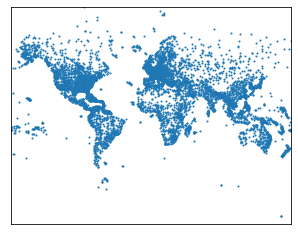

In [6]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
plt.show()

# 7. Customizing The Plot Using Basemap

You'll notice that the outlines of the coasts for each continent are missing from the map above. We can display the coast lines using the `basemap.drawcoastlines()` method.

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


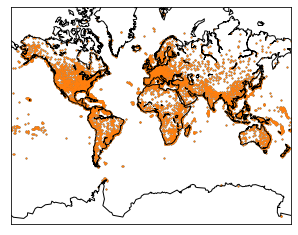

In [7]:
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

# 8. Customizing The Plot Using Matplotlib

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until


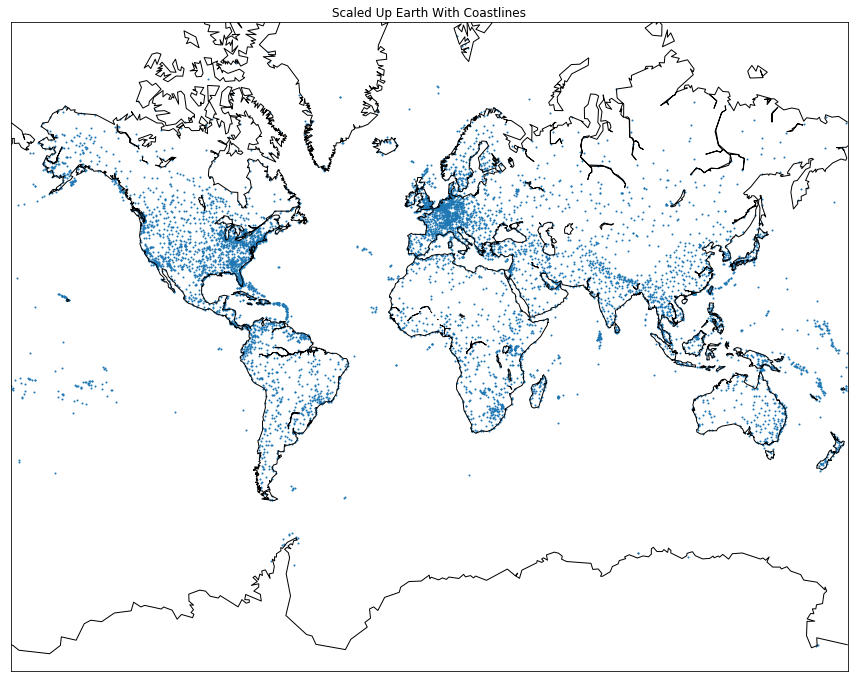

In [8]:
fig, ax = plt.subplots(figsize=(15,20))
plt.title("Scaled Up Earth With Coastlines")
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
longitudes = airports["longitude"].tolist()
latitudes = airports["latitude"].tolist()
x, y = m(longitudes, latitudes)
m.scatter(x, y, s=1)
m.drawcoastlines()
plt.show()

# 9. Introduction to Great Circles

To better understand the flight routes, we can draw great circles to connect starting and ending locations on a map. A great circle is the shortest circle connecting 2 points on a sphere.

On a two-dimensional map, the great circle is demonstrated as a line because it is projected from three-dimensional down to two-dimensional using the map projection. We can use these to visualize the flight routes from the routes dataframe. To plot great circles, we need the source longitude, source latitude, destination longitude, and the destination latitude for each route. 

In [9]:
geo_routes = pd.read_csv("geo_routes.csv")
print(geo_routes.info())
print(geo_routes.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67428 entries, 0 to 67427
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   airline    67428 non-null  object 
 1   source     67428 non-null  object 
 2   dest       67428 non-null  object 
 3   equipment  67410 non-null  object 
 4   start_lon  67428 non-null  float64
 5   end_lon    67428 non-null  float64
 6   start_lat  67428 non-null  float64
 7   end_lat    67428 non-null  float64
dtypes: float64(4), object(4)
memory usage: 4.1+ MB
None
  airline source dest equipment  start_lon    end_lon  start_lat    end_lat
0      2B    AER  KZN       CR2  39.956589  49.278728  43.449928  55.606186
1      2B    ASF  KZN       CR2  48.006278  49.278728  46.283333  55.606186
2      2B    ASF  MRV       CR2  48.006278  43.081889  46.283333  44.225072
3      2B    CEK  KZN       CR2  61.503333  49.278728  55.305836  55.606186
4      2B    CEK  OVB       CR2  61.503333  82.650656  

# 10. Displaying Great Circles

We use the basemap.drawgreatcircle() method to display a great circle between 2 points. The basemap.drawgreatcircle() method requires four parameters in the following order:

* lon1 - longitude of the starting point.
* lat1 - latitude of the starting point.
* lon2 - longitude of the ending point.
* lat2 - latitude of the ending point.

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


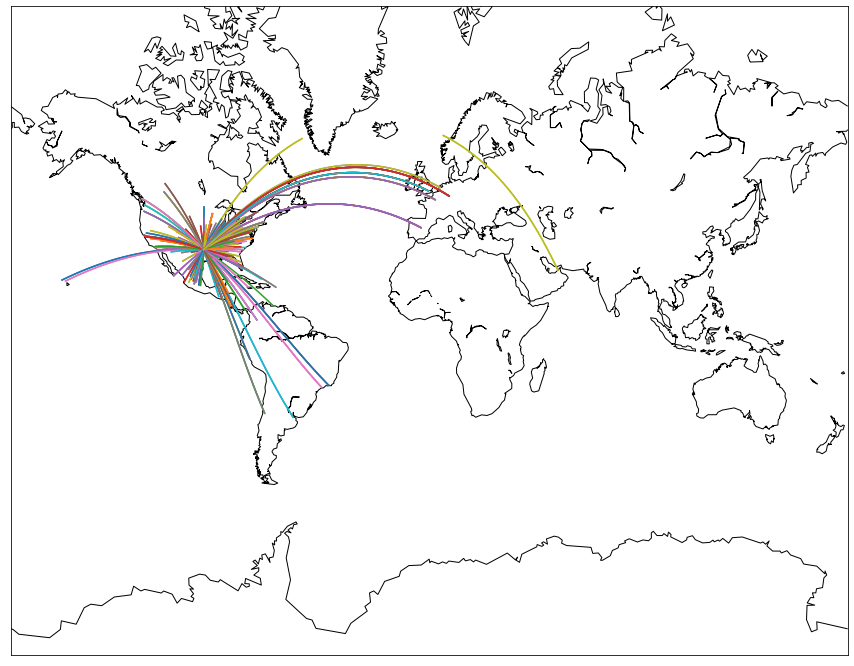

In [10]:
fig, ax = plt.subplots(figsize=(15,20))
m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines()

def create_great_circles(df):
    for index, row in df.iterrows():
        end_lat, start_lat = row['end_lat'], row['start_lat']
        end_lon, start_lon = row['end_lon'], row['start_lon']
        
        if abs(end_lat - start_lat) < 180:
            if abs(end_lon - start_lon) < 180:
                m.drawgreatcircle(start_lon, start_lat, end_lon, end_lat)

dfw = geo_routes[geo_routes['source'] == "DFW"]
create_great_circles(dfw)
plt.show()

We encourage you to keep exploring data visualization on your own. Here are some suggestions for what to do next:

**Plotting tools:**

* [Creating 3D plots using Plotly](https://plot.ly/python/3d-scatter-plots/)
* [Creating interactive visualizations using bokeh](http://bokeh.pydata.org/en/latest/)
* [Creating interactive map visualizations using folium](http://python-visualization.github.io/folium/)

**The art and science of data visualization:**
* [Visual Display of Quantitative Information](https://www.amazon.com/Visual-Display-Quantitative-Information/dp/0961392142)
* [Visual Explanations: Images and Quantities, Evidence and Narrative](https://www.amazon.com/Visual-Explanations-Quantities-Evidence-Narrative/dp/0961392126)